In [2]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from keras import Model
from keras import layers
from keras import models
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import backend as K
from skimage import transform, io, data
import glob
import os
import pandas as pd





Using TensorFlow backend.


In [23]:
def resize_img(img):
    img = transform.resize(img,(48,48))
    return img

In [3]:
def readTrafficSigns(data_dir):
    directories = [d for d in os.listdir(data_dir)
                  if os.path.isdir(os.path.join(data_dir, d))]
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f)
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

In [4]:
x_train, y_train = readTrafficSigns('./GTSRB/Final_Training/Images')

In [5]:
X = [transform.resize(image,(64,64)) for image in x_train]
    

C:\Users\ankit\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\ankit\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [6]:
X[0].shape

(64, 64, 3)

In [7]:
X_train = np.array(X)
Y_train = to_categorical(y_train,43)


#X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

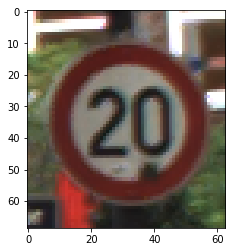

In [8]:
plt.imshow(x_train[200])

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',
                     input_shape=(64,64,3),
                     activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), padding='same',
                 activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), padding='same',
                 activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(43, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
__________

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [13]:
history = model.fit(X_train, Y_train, epochs = 20 , batch_size=32, validation_split=0.2, shuffle=True)

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 602s 19ms/step - loss: 0.5725 - acc: 0.8244 - val_loss: 15.9166 - val_acc: 1.2752e-04
Epoch 2/20
31367/31367 [==============================] - 37s 1ms/step - loss: 0.1055 - acc: 0.9689 - val_loss: 15.2791 - val_acc: 0.0010
Epoch 3/20
31367/31367 [==============================] - 37s 1ms/step - loss: 0.0648 - acc: 0.9807 - val_loss: 15.3736 - val_acc: 7.6511e-04
Epoch 4/20
31367/31367 [==============================] - 36s 1ms/step - loss: 0.0488 - acc: 0.9852 - val_loss: 12.0811 - val_acc: 1.2752e-04
Epoch 5/20
31367/31367 [==============================] - 36s 1ms/step - loss: 0.0483 - acc: 0.9843 - val_loss: 15.9119 - val_acc: 8.9263e-04
Epoch 6/20
31367/31367 [==============================] - 37s 1ms/step - loss: 0.0328 - acc: 0.9899 - val_loss: 15.7986 - val_acc: 2.5504e-04
Epoch 7/20
31367/31367 [==============================] - 36s 1ms/step - loss: 0.0344 - acc: 0.9901 -

In [26]:
test = pd.read_csv('./GTSRB/GT-final_test.csv', sep=';')

In [27]:
test

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000.ppm,53,54,6,5,48,49,16
1,00001.ppm,42,45,5,5,36,40,1
2,00002.ppm,48,52,6,6,43,47,38
3,00003.ppm,27,29,5,5,22,24,33
4,00004.ppm,60,57,5,5,55,52,11
5,00005.ppm,52,56,5,5,47,51,38
6,00006.ppm,147,130,12,12,135,119,18
7,00007.ppm,32,33,5,5,26,28,12
8,00008.ppm,45,50,6,5,40,45,25
9,00009.ppm,81,86,7,7,74,79,35


In [28]:
X_test = []
y_test = []
i = 0
for file_name, class_id in zip(list(test['Filename']), list(test['ClassId'])):
    img_path = os.path.join('GTSRB/Final_Test/Images/', file_name)
    X_test.append(io.imread(img_path))
    y_test.append(class_id)

In [31]:
X_t = [transform.resize(image,(64,64)) for image in X_test]

In [44]:
X_t = np.array(X_t)
Y_t = np.array(y_test)
Y_t = to_categorical(Y_t,43)

In [38]:
y_pred = model.predict_classes(X_t)

In [39]:
acc = np.sum(y_pred == y_test) / np.size(y_pred)

In [40]:
print("Test accuracy = {}".format(acc))

Test accuracy = 0.7836896278701504


In [41]:
train_loss, train_accuracy = model.evaluate(X_train, Y_train, batch_size=32)

39209/39209 [==============================] - 110s 3ms/step


In [45]:
test_loss, test_accuracy = model.evaluate(X_t, Y_t, batch_size=32)

12630/12630 [==============================] - 6s 454us/step


In [43]:
train_accuracy

0.8002499426152159

In [46]:
test_accuracy

0.7836896278229575